# Importing necessary liblraries

In [1]:
# Firstly we will load the libraries that we require as seen below
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

Installing missingno library for analysing the **missing values**.

In [2]:
# pip install missingno

# Loading Training and Testing Datasets

In [3]:
titanic_data = pd.read_csv('./titanic.csv')

Concating training and testing dataset for preprocessing it.

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the information of the dataset


*   Analysing the datatype of each column
*   Analysing the total number of records



In [5]:
#Whenever we get any data we will see the information that we have with us using info () function, in it we can see the column names, data types, and non-null count
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Missing Values

Checking the number of missing values in a dataset.

In [6]:
#Now we will check for the null values in our dataset.

#Using is null () which will give answer in TRUE or FALSE. By using the sum () function with it will provide the total null values in each column.

#Generally we fill the columns that are essential (ex- Age) and drop the ones which are not (ex-Name, Passenger ID etc.).
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ploting the number of records each column have with the help of missingno liblrary

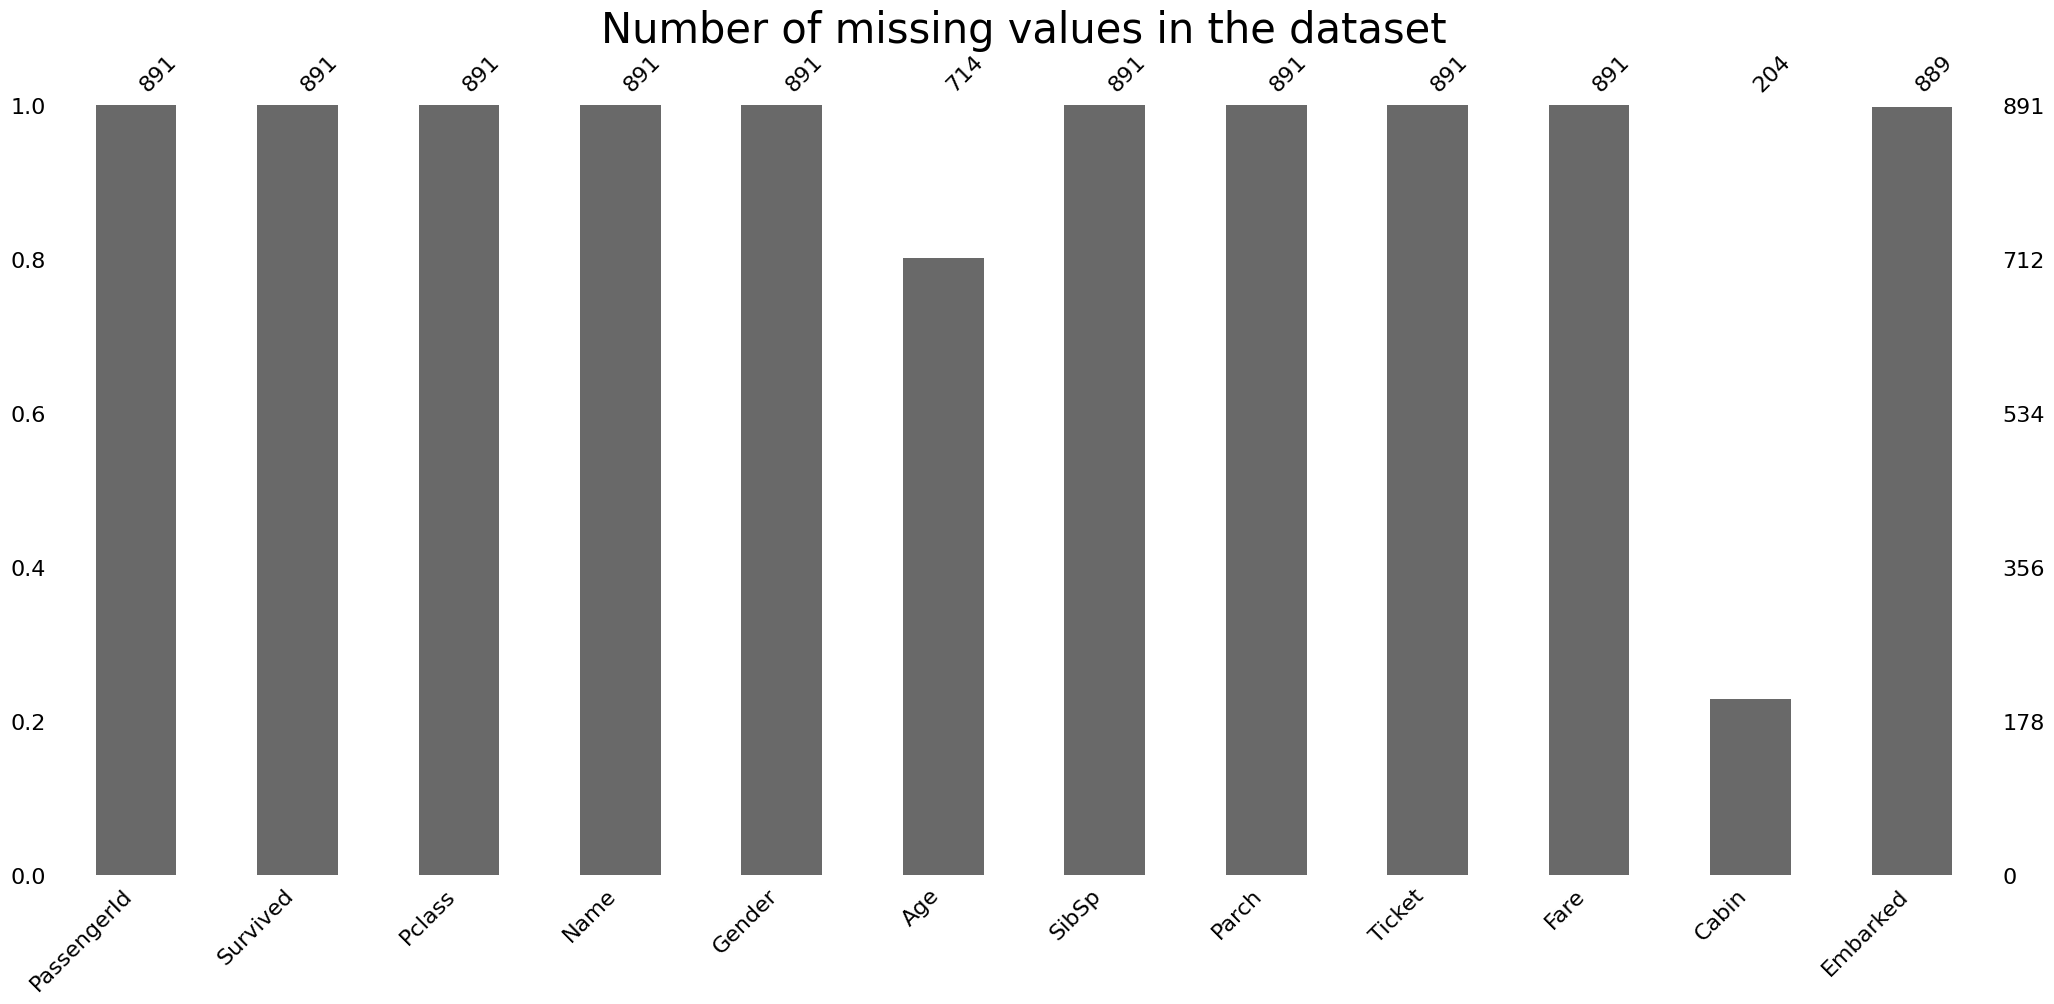

In [7]:
msno.bar(titanic_data)
plt.title('Number of missing values in the dataset',size=30)
plt.show()

Visualizing the Null values distribution all over the dataset with the help of missingno

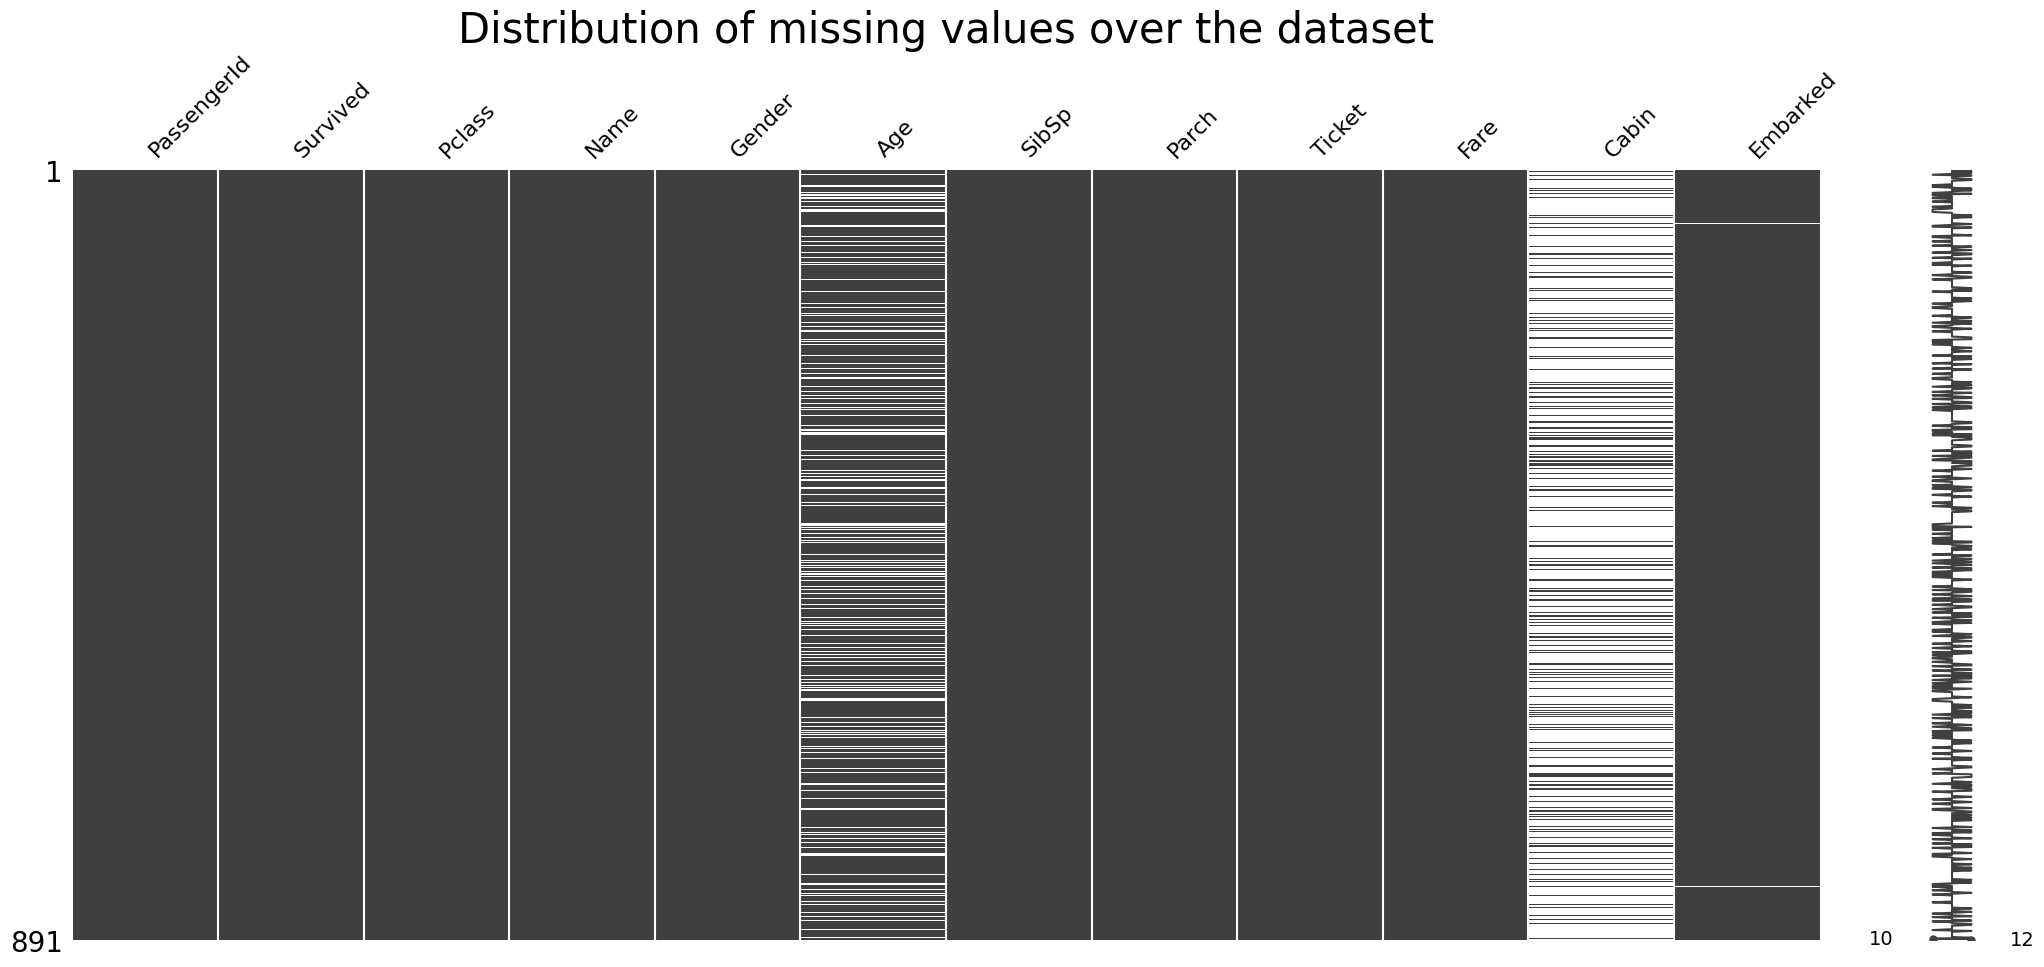

In [8]:
msno.matrix(titanic_data)
plt.title('Distribution of missing values over the dataset',size=30)
plt.show()

Relationships between two predictor variables(Age and Fare) using the seaborn regressin plot and setting title,grid and figure size with the help of matplotlib.

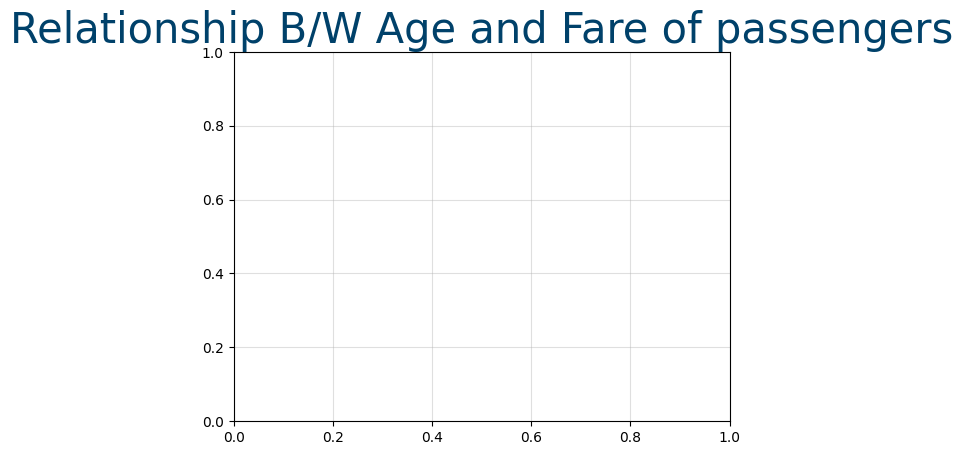

In [9]:
# Now we will try to visualize our data by making some graphs for ourselves so that we know what we are dealing with.
# 1st graph, it’s a regression plot between Age and Fare. Normally we see that as age increases Fare price is also increasing.
# plt.figure(figsize=(15,7))
# sns.regplot(data=titanic_data,x='Age',y='Fare')
plt.title('Relationship B/W Age and Fare of passengers',size=30,color='#00416A')
plt.grid(alpha=0.4)
plt.show()

There is a incorrect value (11) in the Survived column in the rows shown bellow

In [10]:
titanic_data[titanic_data['Survived']==11]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Replacing 11 with 1 for solving the incorrect value problem

In [12]:
titanic_data['Survived'].replace(11,1,inplace=True)

In [13]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Relationships between a predictor variable and the predicted (target) variable(Age and Survived) using the seaborn regressin plot and setting title,grid and figure size with the help of matplotlib.

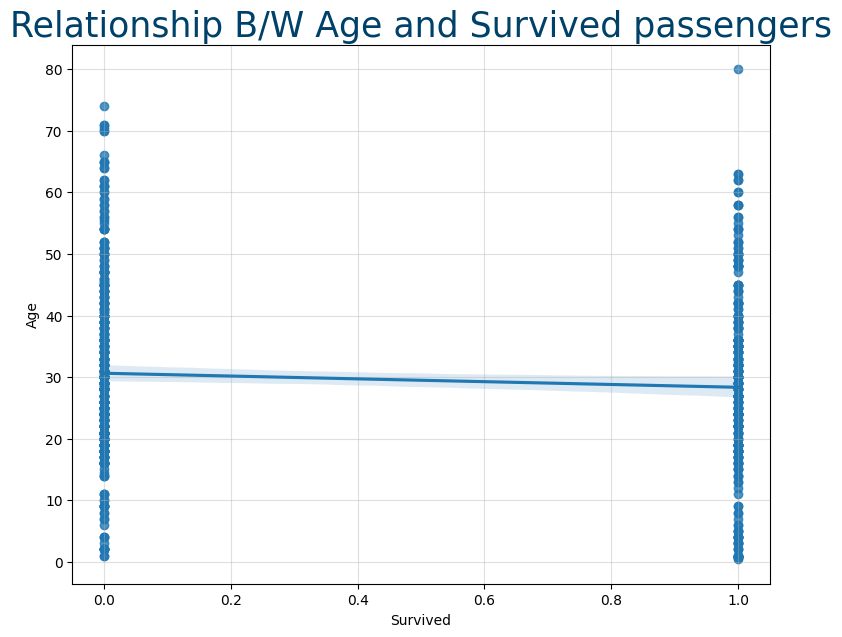

In [14]:
# Likewise here we have another regression plot between Age and Survived. Here there is not any significant difference between the age of the people who survived and those who couldn’t.
# Here we have given the size and colour (Hex code of a colour we want).
plt.figure(figsize=(9,7))
sns.regplot(data=titanic_data,x='Survived',y='Age')
plt.title('Relationship B/W Age and Survived passengers',size=25,color='#00416A')
plt.grid(alpha=0.4)
plt.show()

Now we are checking the correlation between the predictor variables and the target variable(Survived). So we can understand which feature effect most the target column.

In [15]:
corr = titanic_data.corr()[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [ ]:
#Here above we calculate the correlation first and the arrange the columns for better representations
	       #And then we plot the heat map with the help of the seaborne library.

plt.figure(figsize=(15,7))
sns.heatmap(data=corr,annot=True)
plt.title('Correlation B/w Predictor Features and Survived',size=25,color='#00416A')
plt.show()

A count plot showing the number of people who survived and people with not survived.



# Visualizing Data to understand the data and filling the missing values

C:\Users\acer\AppData\Local\Temp\ipykernel_12824\2140590276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_data,x='Survived',palette='vlag')


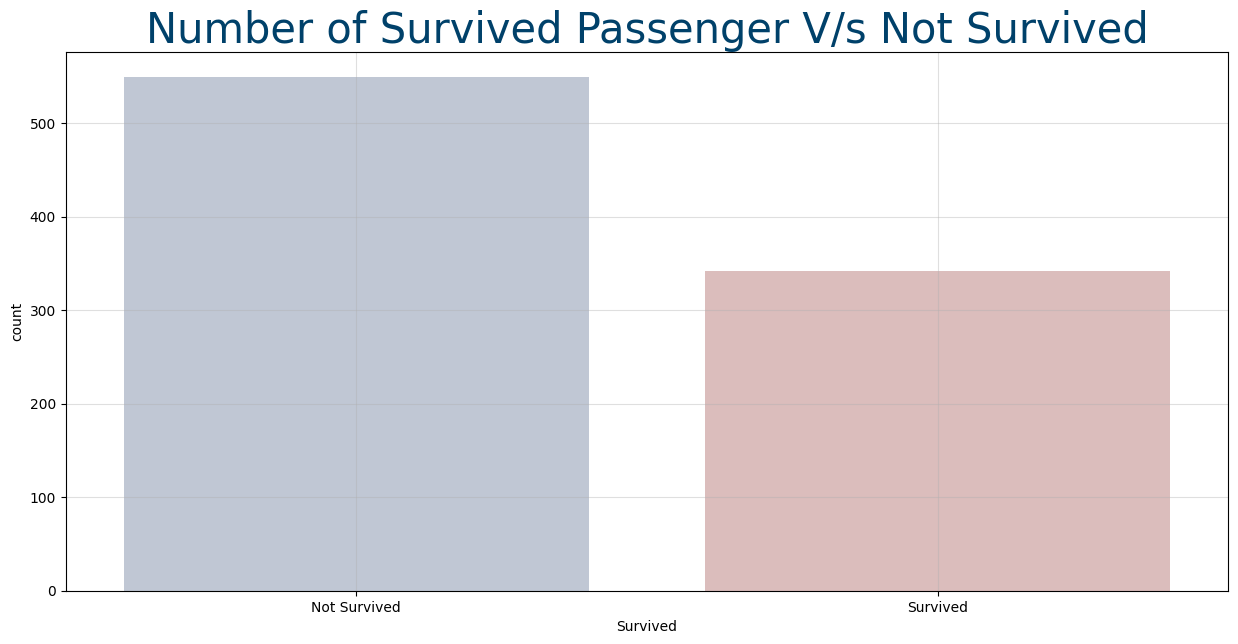

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(data=titanic_data,x='Survived',palette='vlag')
plt.title('Number of Survived Passenger V/s Not Survived',size=30,color='#00416A')
plt.grid(alpha=0.4)
plt.xticks([0,1],['Not Survived','Survived'])
plt.show()


Here we see Gender wise the people Survived and not Survived. Certainly it is seen that females are given preference over male while evacuating the people.


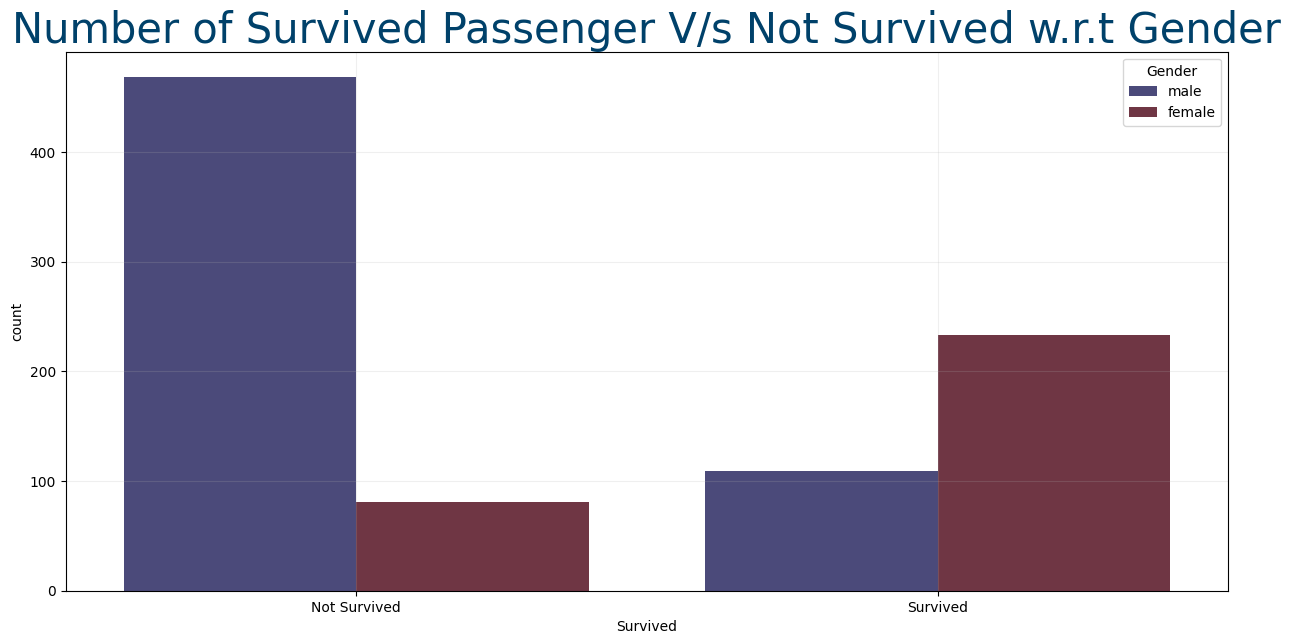

In [17]:
plt.figure(figsize=(15,7))
sns.countplot(data=titanic_data,x='Survived',hue='Gender',palette='icefire')
plt.title('Number of Survived Passenger V/s Not Survived w.r.t Gender',size=30,color='#00416A')
plt.grid(alpha=0.2)
plt.xticks([0,1],['Not Survived','Survived'])
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_12824\415949428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_data,x='Pclass',palette='flare')


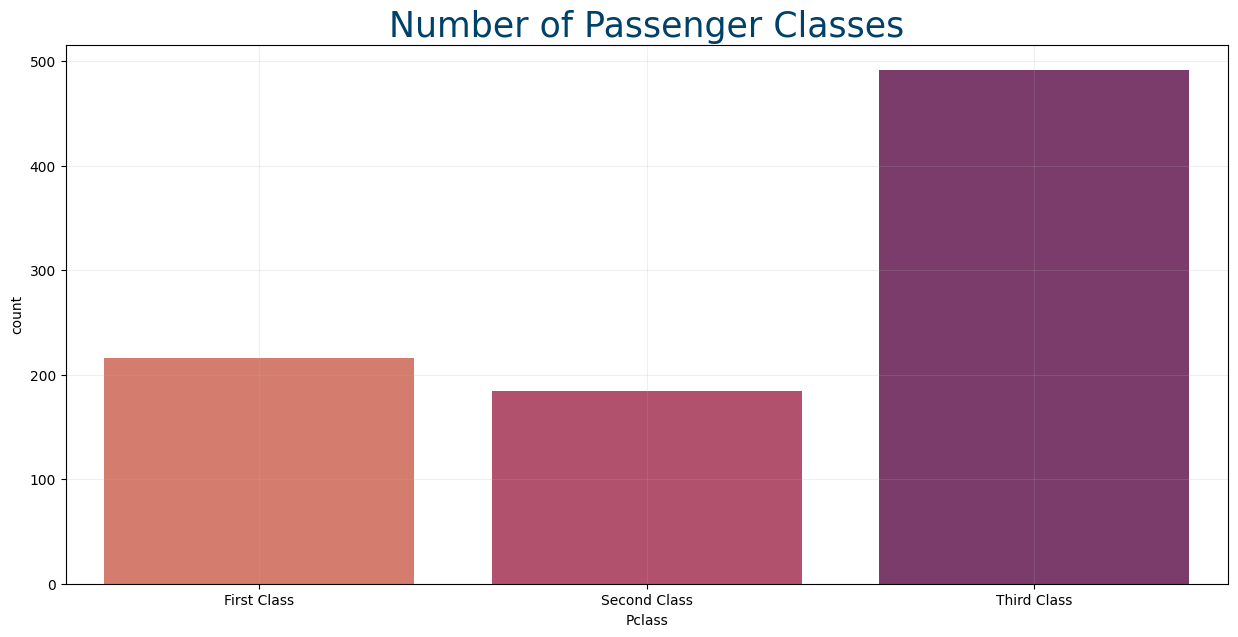

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(data=titanic_data,x='Pclass',palette='flare')
plt.title('Number of Passenger Classes',size=25,color='#00416A')
plt.grid(alpha=0.2)
plt.xticks([0,1,2],['First Class','Second Class','Third Class'])
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_12824\2973607174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_data,x='Pclass',y='Age',palette='vlag')


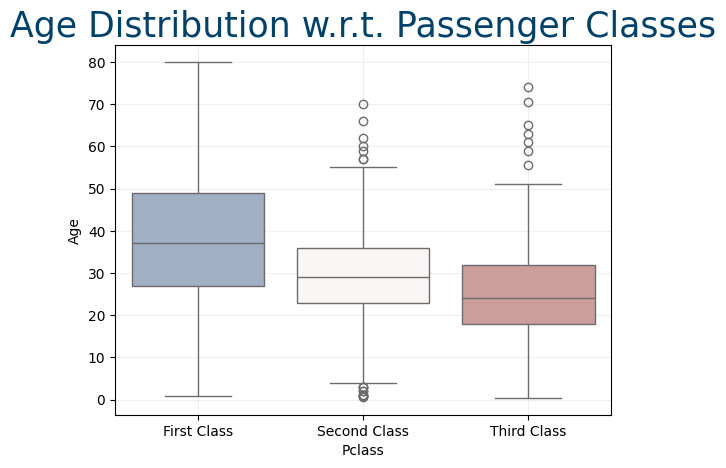

In [19]:
#Now here is a boxplot showing the Age distribution with respect to Passenger classplt.figure(figsize=(15,7))
sns.boxplot(data=titanic_data,x='Pclass',y='Age',palette='vlag')
plt.title('Age Distribution w.r.t. Passenger Classes',size=25,color='#00416A')
plt.grid(alpha=0.2)
plt.xticks([0,1,2],['First Class','Second Class','Third Class'])
plt.show()

Now here’s a Boxplot which will be very useful when we will be filling the values in the Age Column. Boxplot shows us the mean age of Males and Female according to the class. The diamond like shape are the outliers in our dataset, which are numbered so that will not be a problem

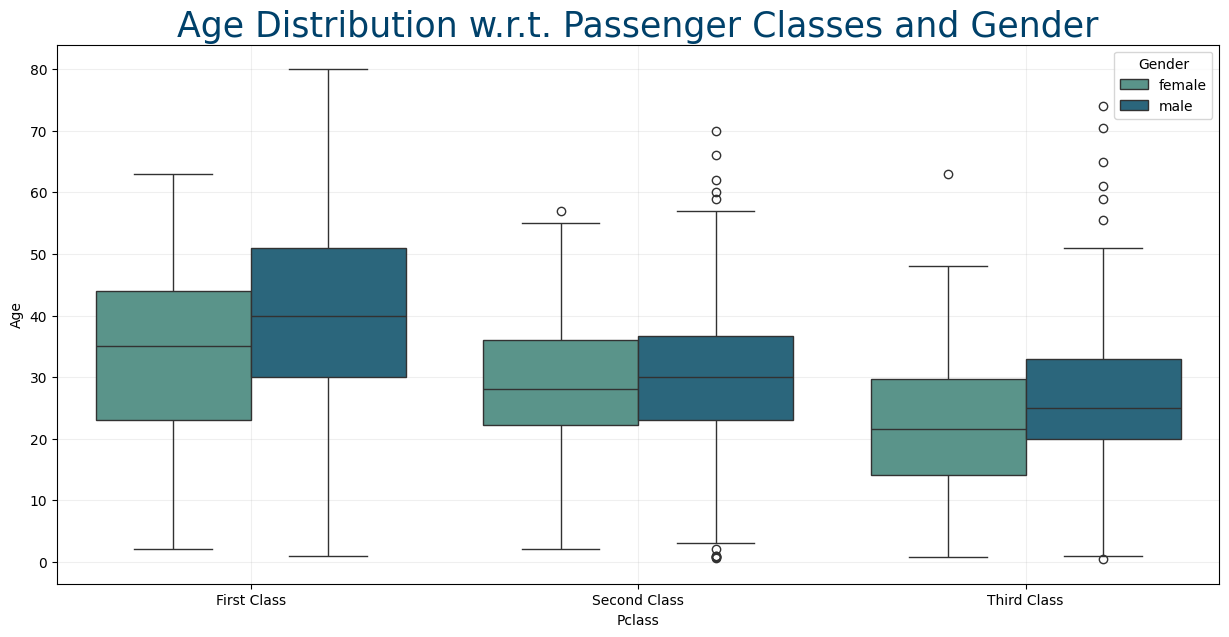

In [20]:
plt.figure(figsize=(15,7))
sns.boxplot(data=titanic_data,x='Pclass',y='Age',hue='Gender',palette='crest')
plt.title('Age Distribution w.r.t. Passenger Classes and Gender',size=25,color='#00416A')
plt.xticks([0,1,2],['First Class','Second Class','Third Class'])
plt.grid(alpha=0.2)
plt.show()

# Fix missing/incorrect data fields.



In [21]:
titanic_data[titanic_data['Gender']=='male'].groupby(by='Pclass').mean()

TypeError: Could not convert McCarthy, Mr. Timothy JSloper, Mr. William ThompsonFortune, Mr. Charles AlexanderUruchurtu, Don. Manuel EMeyer, Mr. Edgar JosephHolverson, Mr. Alexander OskarOstby, Mr. Engelhart CorneliusWoolner, Mr. HughHarris, Mr. Henry BirkhardtStewart, Mr. Albert ACarrau, Mr. Francisco MChaffee, Mr. Herbert FullerGoldschmidt, Mr. George BGreenfield, Mr. William BertramWhite, Mr. Richard FrasarPorter, Mr. Walter ChamberlainBaxter, Mr. Quigg EdmondWhite, Mr. Percival WaylandFutrelle, Mr. Jacques HeathGiglio, Mr. VictorWilliams, Mr. Charles DuaneBaumann, Mr. John DVan der hoef, Mr. WyckoffSmith, Mr. James ClinchRood, Mr. Hugh RoscoeRomaine, Mr. Charles Hallace ("Mr C Rolmane")Blank, Mr. HenryHoyt, Mr. Frederick MaxfieldMinahan, Dr. William EdwardBeckwith, Mr. Richard LeonardStead, Mr. William ThomasTaussig, Mr. EmilHarrison, Mr. WilliamCairns, Mr. AlexanderNatsch, Mr. Charles HSmith, Mr. Richard WilliamLewy, Mr. Ervin GSaalfeld, Mr. AdolpheAllison, Master. Hudson TrevorPartner, Mr. AustenGraham, Mr. George EdwardPears, Mr. Thomas ClintonBlackwell, Mr. Stephen WeartWilliams-Lambert, Mr. Fletcher FellowsHarder, Mr. George AchillesRinghini, Mr. SanteWidener, Mr. Harry ElkinsCarter, Mr. William ErnestBjornstrom-Steffansson, Mr. Mauritz HakanSilvey, Mr. William BairdFortune, Mr. MarkDodge, Master. WashingtonSeward, Mr. Frederic KimberPeuchen, Major. Arthur GodfreyForeman, Mr. Benjamin LaventallGoldenberg, Mr. Samuel LMillet, Mr. Francis DavisAnderson, Mr. HarryGee, Mr. Arthur HSmart, Mr. John MontgomeryClifford, Mr. George QuincyBishop, Mr. Dickinson HKent, Mr. Edward AustinMolson, Mr. Harry MarklandArtagaveytia, Mr. RamonPenasco y Castellana, Mr. Victor de SatodeBradley, Mr. George ("George Arthur Brayton")McGough, Mr. James RobertWalker, Mr. William AndersonFarthing, Mr. JohnButt, Major. Archibald WillinghamDouglas, Mr. Walter DonaldNicholson, Mr. Arthur ErnestThayer, Mr. John Borland JrWright, Mr. GeorgeRobbins, Mr. VictorFlynn, Mr. John Irwin ("Irving")Ross, Mr. John HugoFrolicher-Stehli, Mr. MaxmillianDuff Gordon, Sir. Cosmo Edmund ("Mr Morgan")Harrington, Mr. Charles HHomer, Mr. Harry ("Mr E Haven")Daniel, Mr. Robert WilliamsKimball, Mr. Edwin Nelson JrSutton, Mr. FrederickBarkworth, Mr. Algernon Henry WilsonStahelin-Maeglin, Dr. MaxParr, Mr. William Henry MarshHarper, Mr. Henry SleeperSimonius-Blumer, Col. Oberst AlfonsNewell, Mr. Arthur WebsterFrauenthal, Dr. Henry WilliamColley, Mr. Edward PomeroyDavidson, Mr. ThorntonCardeza, Mr. Thomas Drake MartinezHassab, Mr. HammadDick, Mr. Albert AdrianWeir, Col. JohnThayer, Mr. John BorlandSilverthorne, Mr. Spencer VictorCalderhead, Mr. Edward PenningtonKlaber, Mr. HermanTaylor, Mr. Elmer ZebleyChambers, Mr. Norman CampbellLesurer, Mr. Gustave JHawksford, Mr. Walter JamesCavendish, Mr. Tyrell WilliamCrosby, Capt. Edward GiffordMarvin, Mr. Daniel WarnerBrewe, Dr. Arthur JacksonLong, Mr. Milton ClydeGuggenheim, Mr. BenjaminHoyt, Mr. William FisherCarter, Master. William Thornton IIAndrews, Mr. Thomas JrFry, Mr. RichardReuchlin, Jonkheer. John GeorgeMarechal, Mr. PierreDaly, Mr. Peter Denis Roebling, Mr. Washington Augustus IICarlsson, Mr. Frans OlofBehr, Mr. Karl Howell to numeric

In [ ]:
titanic_data[titanic_data['Gender']=='female'].groupby(by='Pclass').mean()

In [ ]:
def fill_age(row):
  pclass = row[0]
  age = row[1]
  gender = row[2]
  if pd.isnull(age):
    if gender=='male':
      if pclass==1:
        return 41
      elif pclass==2:
        return 30
      elif pclass==3:
        return 25
    elif gender=='female':
      if pclass==1:
        return 37
      elif pclass==2:
        return 27
      elif pclass==3:
        return 22
  else:
    return age

In [22]:
titanic_data['Age'] = titanic_data[['Pclass','Age','Gender']].apply(fill_age,axis=1)

NameError: name 'fill_age' is not defined

In [23]:
titanic_data['Has Cabin'] = titanic_data["Cabin"].apply(lambda x: 0 if pd.isnull(x) else 1)

In [24]:
titanic_data['Has Cabin'].value_counts()

Has Cabin
0    687
1    204
Name: count, dtype: int64

In [25]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Has Cabin        0
dtype: int64

In [26]:
titanic_data.drop(['PassengerId','Name','Ticket',"Cabin"],axis=1,inplace=True)

In [27]:
titanic_data.dropna(inplace=True)

In [28]:
titanic_data.reset_index(drop=True,inplace=True)

In [29]:
titanic_data.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Has Cabin
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


# Using 'Feature engineering,' to create new features from the original data

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [31]:
label_enco = LabelEncoder()
one_hot = OneHotEncoder()

In [32]:
label_enco.fit(titanic_data['Gender'])

LabelEncoder()

In [33]:
titanic_data['Gender'] = label_enco.transform(titanic_data['Gender'])

In [34]:
one_hot.fit(titanic_data[['Embarked']])

OneHotEncoder()

In [35]:
temp_arr = one_hot.transform(titanic_data[['Embarked']]).toarray()

In [36]:
temp_arr

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [37]:
one_hot.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [38]:
temp_data = pd.DataFrame(temp_arr,columns=['C', 'Q', 'S'],dtype='int')

In [39]:
temp_data.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [40]:
titanic_data = pd.concat([titanic_data,temp_data],axis=1)

In [41]:
titanic_data.drop('Embarked',axis=1,inplace=True)

In [42]:
titanic_data.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Has Cabin,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,0,1


# Build and tune the model

In [43]:
X = titanic_data.drop('Survived',axis=1)
Y = titanic_data['Survived']

In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [45]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

In [46]:
logistic_model = logistic.fit(X_train,Y_train)

C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# Storing the Predicitons from our model.
predictions = logistic_model.predict(X_test)

In [48]:
# Report model performance results.
logistic_model_accuracy = logistic_model.score(X_test, Y_test)
#Change this
print('Model Accuracy is {0:.2F}%'.format(logistic_model_accuracy * 100))

Model Accuracy is 81.12%


Printing the confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(predictions,Y_test))

[[75 18]
 [ 9 41]]


Printing the classification report 

In [50]:
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        93
           1       0.69      0.82      0.75        50

    accuracy                           0.81       143
   macro avg       0.79      0.81      0.80       143
weighted avg       0.82      0.81      0.81       143



# SOME QUESTIONS

How is survival influenced based on passenger ticket class?

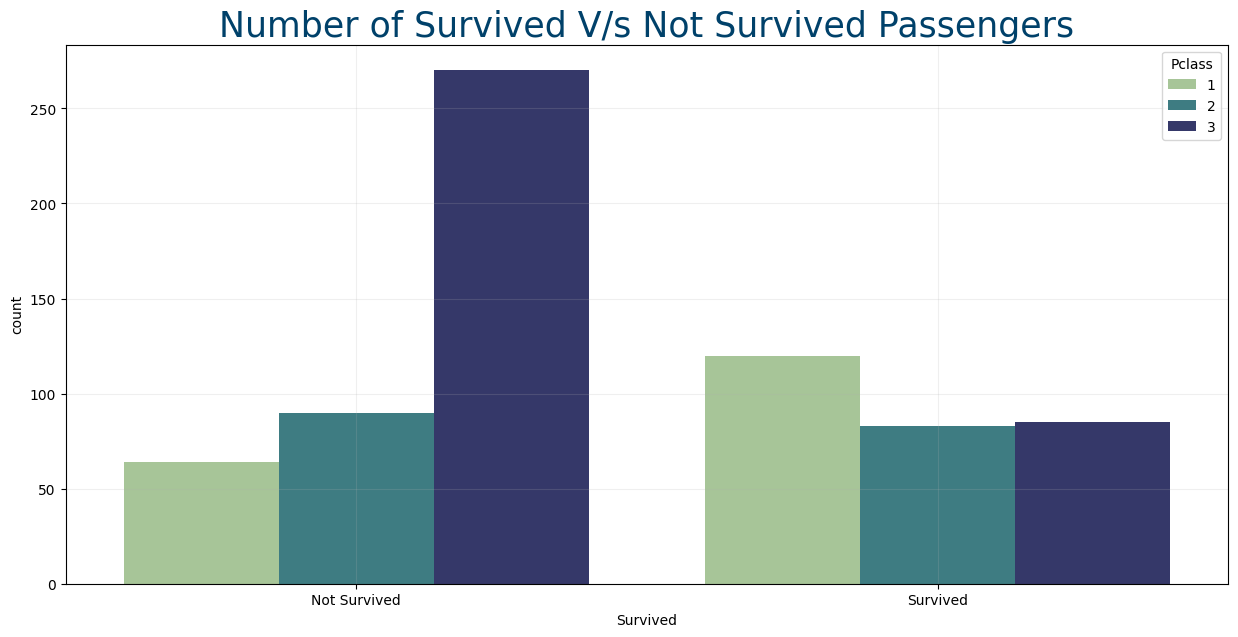

In [51]:
plt.figure(figsize=(15,7))
sns.countplot(data=titanic_data,x='Survived',hue='Pclass',palette='crest')
plt.title('Number of Survived V/s Not Survived Passengers',size=25,color='#00416A')
plt.xticks([0,1],['Not Survived','Survived'])
plt.grid(alpha=0.2)
plt.show()

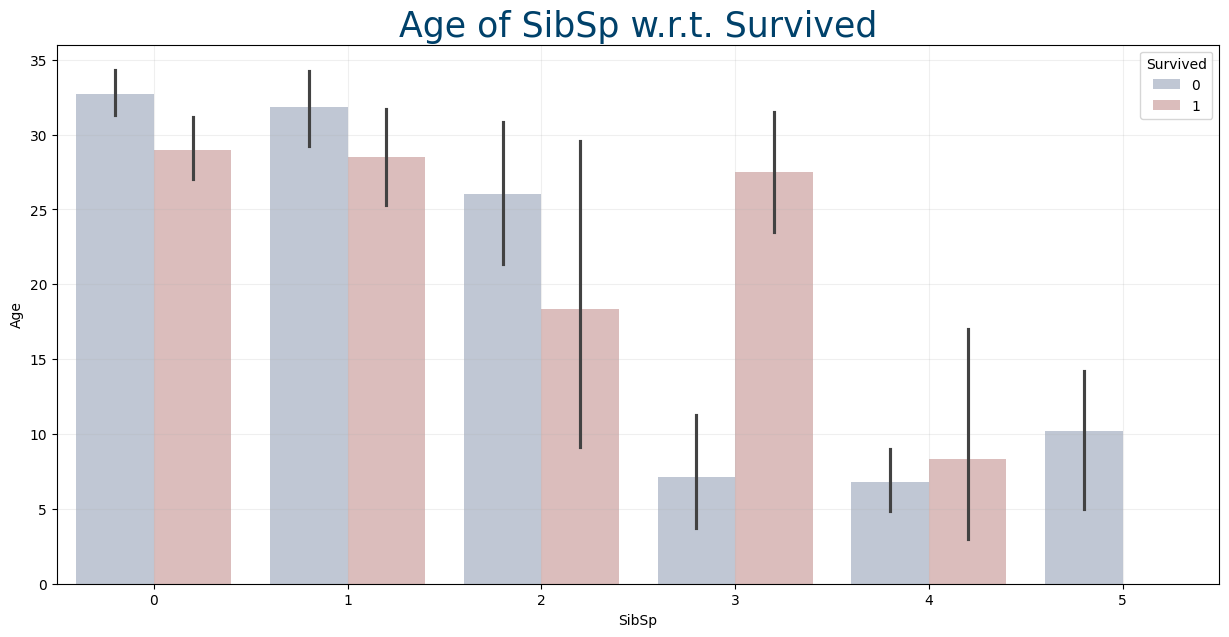

In [52]:
plt.figure(figsize=(15,7))
sns.barplot(data=titanic_data,x='SibSp',y='Age',hue='Survived',palette='vlag')
plt.title('Age of SibSp w.r.t. Survived',size=25,color='#00416A')
plt.grid(alpha=0.2)
plt.show()